In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy import signal
import scipy.fft as fft

In [8]:
def show_signal_and_spectar(s, S):
    S = abs(S)
    N = len(S)
    n = np.arange(N)
    T = N/len(s)
    freq = n/T
    n_oneside = N//2
    f_oneside = freq[:n_oneside]

    S_oneside =S[:n_oneside]/n_oneside
    plt.figure(1,figsize=(8, 6), dpi=150) 
    plt.subplot(2,1,1)
    plt.plot(t, s, color="b")
    plt.xlabel('t')
    plt.ylabel('s')
    plt.title('Amplituda')
    plt.grid()
    plt.subplots_adjust(hspace=0.3)
    plt.subplot(2,1,2)
    plt.stem(f_oneside, abs(S_oneside), linefmt='b', markerfmt=" ", basefmt="-b")
    plt.xlabel('Frekvencija [Hz]')
    plt.ylabel('Normalizovana amplituda')
    plt.title('Frekvencijski domen')
    plt.grid()
    plt.show()

## Originalni signal

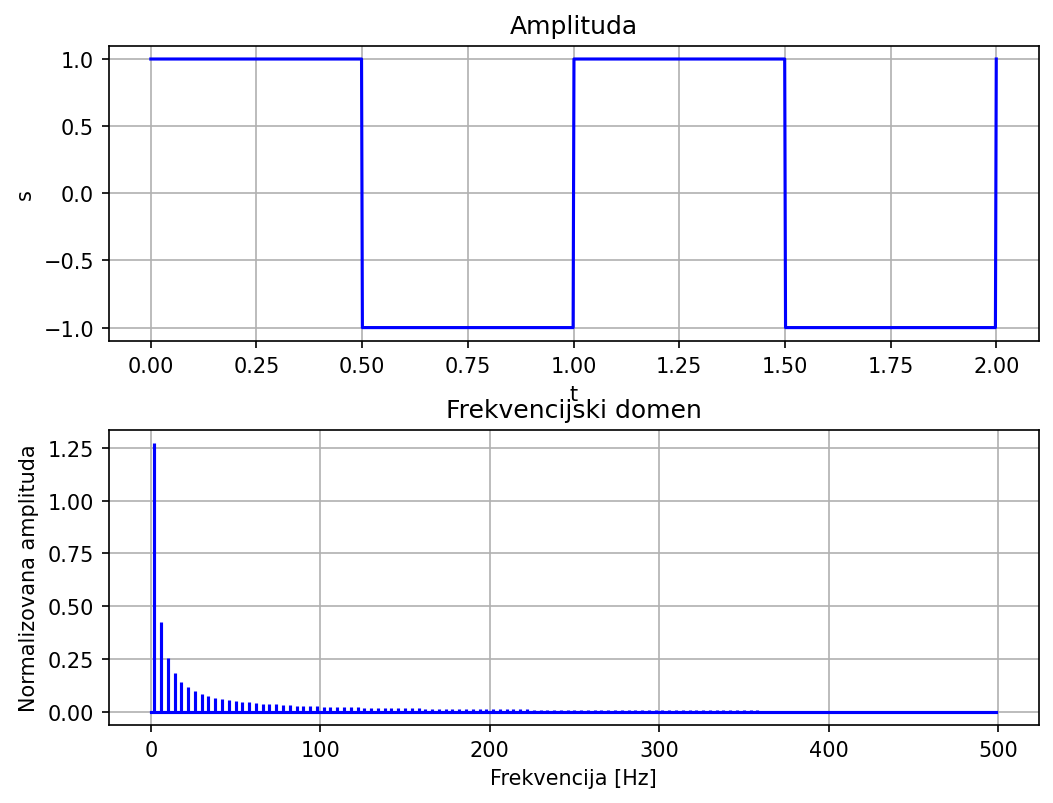

In [21]:
t = np.linspace(0,2, 1000)
s = signal.square(2*np.pi*t)
S = fft.fft(s)
N = len(S)
n = np.arange(N)
T = N/len(s)
freq = n/T

show_signal_and_spectar(s,S)

## Nisko propusni

In [62]:
@interact(freq_kr=(1, 500))
def nisko_propusni(freq_kr):
    np_filter = signal.butter(5, freq_kr, 'lowpass', fs=1000, output='sos')
    np_signal = signal.sosfilt(np_filter, s)
    show_signal_and_spectar(np_signal,fft.fft(np_signal))

interactive(children=(IntSlider(value=250, description='freq_kr', max=500, min=1), Output()), _dom_classes=('w…

# Visoko propusni

In [63]:
@interact(freq_kr=(1, 500))
def visoko_propusni(freq_kr):
    vp_filter = signal.butter(5, freq_kr, 'highpass', fs=1000, output='sos')
    vp_signal = signal.sosfilt(vp_filter, s)
    show_signal_and_spectar(vp_signal,fft.fft(vp_signal))

interactive(children=(IntSlider(value=250, description='freq_kr', max=500, min=1), Output()), _dom_classes=('w…

## Propusnik opsega

In [66]:
@interact(freq_kr1=(1, 500), freq_kr2=(1, 500))
def visoko_propusni(freq_kr1, freq_kr2):
    if freq_kr1 > freq_kr2:
        freq_kr2, freq_kr1= freq_kr1, freq_kr2
    po_filter = signal.butter(5, (freq_kr1, freq_kr2), 'bandpass', fs=1000, output='sos')
    po_signal = signal.sosfilt(po_filter, s)
    show_signal_and_spectar(po_signal,fft.fft(po_signal))

interactive(children=(IntSlider(value=250, description='freq_kr1', max=500, min=1), IntSlider(value=250, descr…